In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
anki = pd.read_csv('datasets/revlog.csv')
anki.drop('usn', axis=1, inplace=True)
print(anki.head())
anki.describe()

              id            cid  ease  ivl  lastIvl  factor   time  type
0  1566452085029  1528564711188     2 -600      -60       0  35669     0
1  1566452114529  1528563509845     2 -600      -60       0  29496     0
2  1566452132069  1528563414643     2 -600      -60       0  17538     0
3  1566452142136  1528565827041     2 -600      -60       0   3192     0
4  1566452157395  1528563180004     2 -600      -60       0  15256     0


,id,cid,ease,ivl,lastIvl,factor,time,type
count,9.203400e+04,9.203400e+04,92034.000000,92034.000000,92034.000000,92034.000000,92034.000000,92034.000000
mean,1.604883e+12,1.587196e+12,2.552720,26.037073,-17.526175,1829.961753,15561.682596,0.920964
std,2.444598e+10,3.308237e+10,0.726676,277.796205,208.438389,650.141388,18065.359921,0.404723
min,1.566452e+12,1.335881e+12,1.000000,-600.000000,-600.000000,0.000000,322.000000,0.000000
25%,1.588539e+12,1.580758e+12,2.000000,3.000000,1.000000,1400.000000,3384.000000,1.000000
50%,1.599405e+12,1.588383e+12,3.000000,12.000000,9.000000,1900.000000,7606.500000,1.000000
75%,1.614707e+12,1.603084e+12,3.000000,67.000000,40.000000,2350.000000,19141.000000,1.000000
max,1.690180e+12,1.666706e+12,4.000000,2748.000000,954.000000,3250.000000,60000.000000,3.000000


id -
The time at which the review was conducted, as the number of milliseconds that had passed since midnight UTC on January 1, 1970. (This is sometimes known as 'Unix epoch time', especially when in straight seconds instead of milliseconds.)

cid -
The ID of the card that was reviewed. You can look up this value in the id field of the 'cards' table to get more information about the card, although note that the card could have changed between when the revlog entry was recorded and when you are looking it up. It is also the millisecond timestamp of the card’s creation time.

ease -
Which button you pressed at the end of the review (1 for Again, 4 for Easy).

ivl -
The new interval that the card was pushed to after the review. Positive values are in days; negative values are in seconds (for learning cards).

lastIvl -
The interval the card had before the review. Cards introduced for the first time have a last interval equal to the Again delay.

factor -
The new ease factor of the card in permille (parts per thousand). If the ease factor is 2500, the card’s interval will be multiplied by 2.5 the next time you press Good.

time -
The amount of time (in milliseconds) you spent on the question and answer sides of the card before selecting an ease button.

type -
This is 0 for learning cards, 1 for review cards, 2 for relearning cards, and 3 for early "cram" cards (cards being studied in a filtered deck when they are not due).

Look into the average review time for each card, general trends in increase of memory over longer periods of time due to srs

In [33]:
# pd.DataFrame(
tmp = anki.groupby('cid').apply(lambda x: x.sort_values('id')['ivl'].values)
a = tmp.apply(lambda x: pd.Series(x))
# a.apply(lambda x: plt.plot(x.values), axis=1)
summary = a.apply(lambda x: pd.Series({'median': x.median(), 'sem': x.sem(), 'std': x.std()}))

cid
1335881318503       [Line2D(_child0)]
1335881391590       [Line2D(_child1)]
1335881443087       [Line2D(_child2)]
1336243091843       [Line2D(_child3)]
1336243141238       [Line2D(_child4)]
                         ...         
1665666392278    [Line2D(_child5843)]
1665666455553    [Line2D(_child5844)]
1666673538725    [Line2D(_child5845)]
1666705580977    [Line2D(_child5846)]
1666705639652    [Line2D(_child5847)]
Length: 5848, dtype: object

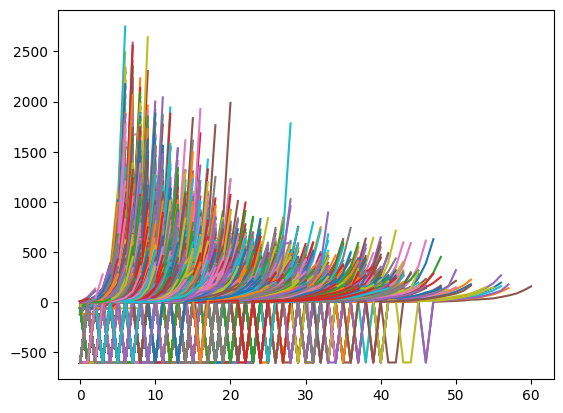

In [37]:
a.apply(lambda x: plt.plot(x.values), axis=1)

In [36]:
summary = summary.transpose()
summary = summary[1:]

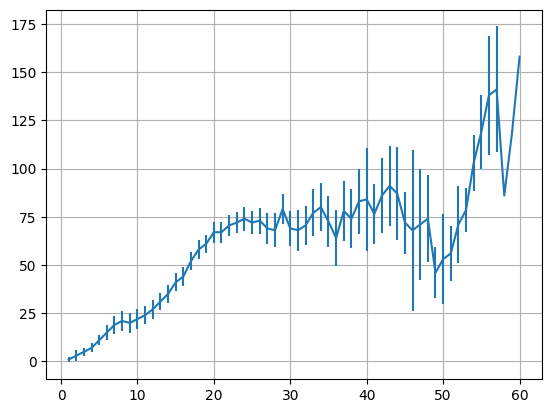

In [35]:
plt.errorbar(summary.index, summary['median'], yerr=summary['sem'])
plt.grid()

In [6]:
testCard = anki[anki['cid'] == 1528565827041]
# sns.scatterplot(x='id', y='ivl', data=testCard)
testCard

,id,cid,ease,ivl,lastIvl,factor,time,type
3,1566452142136,1528565827041,2,-600,-60,0,3192,0
31,1566452447881,1528565827041,2,1,-600,2500,7664,0
49,1566537591755,1528565827041,3,4,1,2500,9690,1
537,1566884284071,1528565827041,2,5,4,2350,11259,1
840,1567290520579,1528565827041,3,9,5,2350,2404,1
1600,1568079839124,1528565827041,3,22,9,2350,2487,1
2817,1569964662136,1528565827041,3,50,22,2350,2511,1
5479,1574299561767,1528565827041,3,113,50,2350,3074,1
13287,1584023136245,1528565827041,3,259,113,2350,8887,1


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

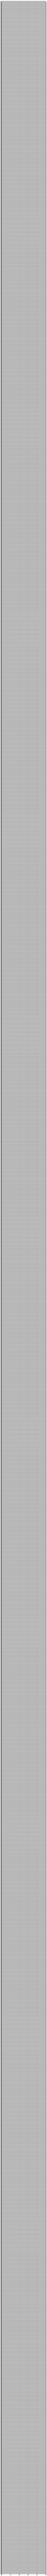

In [4]:
unique_entries = anki['cid'].unique()

sample = np.random.choice(unique_entries, size=100)
fig, axs = plt.subplots(len(unique_entries), figsize=(10, len(unique_entries)/10))

for i, entry in enumerate(unique_entries):
    filtered_df = sample[sample['cid'] == entry]
    sns.scatterplot(x='id', y='ivl', data=filtered_df, ax=axs[i])
    axs[i].set_title(f'Entry: {entry}')

# plt.tight_layout()
# plt.show()

In [16]:
unique_entries = anki['cid'].unique()
fig, axs = plt.subplots(len(unique_entries), figsize=(10, len(unique_entries)/10))

for i, entry in enumerate(unique_entries):
    filtered_df = anki[anki['cid'] == entry]
    sns.scatterplot(x='id', y='ivl', data=filtered_df, ax=axs[i])
    axs[i].set_title(f'Entry: {entry}')

plt.tight_layout()
plt.show()

C:\Users\Jace\AppData\Local\Temp\ipykernel_12064\3585351158.py:9: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
